In [1]:
from sklearn import datasets, neighbors, metrics, model_selection
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
iris = datasets.load_iris()

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

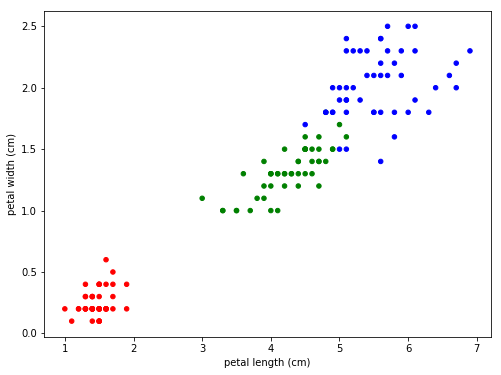

In [5]:
irisdf = pd.DataFrame(iris.data, columns=iris.feature_names)
irisdf['target'] = iris.target
cmap = { 0: 'r', 1: 'g', 2: 'b' }
irisdf['ctarget'] = irisdf.target.map(cmap)
irisdf.plot('petal length (cm)', 'petal width (cm)', kind='scatter', c=irisdf.ctarget, figsize=(8,6))
plt.show()

In [6]:
irisdf.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
irisdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,ctarget
0,5.1,3.5,1.4,0.2,0,r
1,4.9,3.0,1.4,0.2,0,r
2,4.7,3.2,1.3,0.2,0,r
3,4.6,3.1,1.5,0.2,0,r
4,5.0,3.6,1.4,0.2,0,r


### Using distance: KNN implementation

In [8]:
iris = datasets.load_iris()
# n_neighbors is our option in KNN. We'll tune this value to attempt to improve our prediction.
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(iris.data, iris.target)
print(knn.predict(iris.data))
print(iris.target)
print(knn.score(iris.data, iris.target))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
0.9666666666666667


Do we see a change in performance when using the distance weight?

In [9]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance') # add in the weights parameter here
knn.fit(iris.data, iris.target)
print(knn.predict(iris.data))
print(iris.target)
print(knn.score(iris.data, iris.target))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
1.0


### Solution to Solving K

In [10]:
model_selection.GridSearchCV?

In [10]:
k = range(2, 100)
params = {'n_neighbors': k }

kf = model_selection.KFold(n_splits = 5, shuffle=True, random_state=1)
gs = model_selection.GridSearchCV(
    estimator=neighbors.KNeighborsClassifier(),
    param_grid=params,
    cv=kf,
)
gs.fit(iris.data, iris.target)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(2, 100)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [11]:
gs.best_params_

{'n_neighbors': 8}

In [12]:
gs.cv_results_['mean_test_score']

array([0.94      , 0.96      , 0.95333333, 0.95333333, 0.95333333,
       0.96      , 0.96666667, 0.96666667, 0.96666667, 0.96666667,
       0.96666667, 0.96666667, 0.96      , 0.96      , 0.95333333,
       0.96      , 0.96      , 0.96      , 0.96      , 0.96      ,
       0.96666667, 0.96      , 0.94666667, 0.94666667, 0.94666667,
       0.94666667, 0.94      , 0.93333333, 0.94      , 0.94      ,
       0.93333333, 0.94      , 0.94      , 0.93333333, 0.92666667,
       0.92666667, 0.92      , 0.92      , 0.91333333, 0.92      ,
       0.91333333, 0.91333333, 0.91333333, 0.91333333, 0.90666667,
       0.90666667, 0.91333333, 0.9       , 0.91333333, 0.90666667,
       0.90666667, 0.90666667, 0.9       , 0.88666667, 0.9       ,
       0.88666667, 0.88      , 0.88666667, 0.88      , 0.88      ,
       0.88      , 0.88      , 0.87333333, 0.87333333, 0.87333333,
       0.87333333, 0.87333333, 0.84666667, 0.86666667, 0.85333333,
       0.78666667, 0.78666667, 0.78666667, 0.72666667, 0.68666

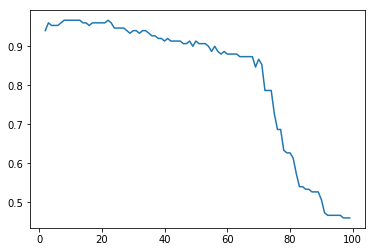

In [13]:
plt.plot(k, gs.cv_results_['mean_test_score'])

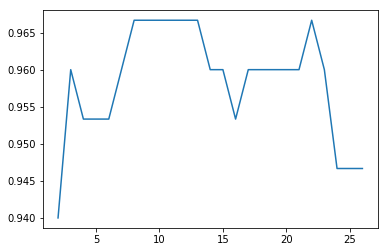

In [14]:
plt.plot(k[:25], gs.cv_results_['mean_test_score'][:25])

In [15]:
gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

### Comparing KNN with Other Models

Advantages of KNN:

- Very easy to understand and implement
- Simple and powerful. No need for tuning complex parameters to build a model.
- No training involved (“lazy”). New training examples can be added easily. 

Disadvantages of KNN:

- Sensitive to localized data. Localized anomalies can affect outcomes significantly. 
- High computation time during testing which can be an issue for large datasets
- Normalization of data is required
- Accuracy affected by high dimensionality of data